In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df.Salary
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float32")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)                
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [2]:
from sklearn.linear_model import Ridge


In [3]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.24737e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [4]:
ridge_model

Ridge(alpha=0.1)

In [5]:
ridge_model.coef_

array([ -1.7743763 ,   8.802537  ,   7.296198  ,  -3.332757  ,
        -2.0832267 ,   5.425361  ,   7.584789  ,  -0.13751952,
        -0.20787102,  -0.6037831 ,   1.7928716 ,   0.7287366 ,
        -0.687124  ,   0.26153573,   0.26888415,  -0.5266787 ,
       112.145966  , -99.809525  , -48.071163  ], dtype=float32)

In [6]:
ridge_model.intercept_

-4.5769043

C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.65849e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.82276e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.19175e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.71527e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\anaconda3\envs\ten

Text(0.5, 1.0, 'düzenlileştirmenin bir fonksiyonu olarak ridge katasyıları')

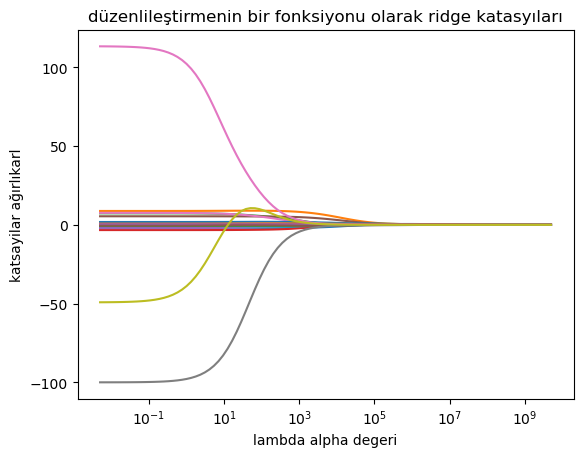

In [7]:
lambdalar=10**np.linspace(10,-2,100)*0.5
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
plt.xlabel("lambda alpha degeri")
plt.ylabel("katsayilar ağırlıkarl")

plt.title("düzenlileştirmenin bir fonksiyonu olarak ridge katasyıları")


In [8]:
lambdalar[0]

5000000000.0

In [9]:
# tahmin

y_pred=ridge_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.051642238428

MODEL TUNIN EN IYI ALPHA DEGERINI CV ILE BULMA


In [15]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar ).fit(X_train, y_train)  #burda normalde normalize=True yapabiliyoruz , scoring=neg_mean_squared_error

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [13]:
ridge_cv.alpha_

2018508.6292982749

In [12]:
ridge_cv.score(X_train,y_train)

0.49085864561378645

In [32]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=4).fit(X_train,y_train)

C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.44735e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [42]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
sc=[]
hata=[]

for i in range(100):
    r=Ridge(alpha=i*0.1).fit(X_train,y_train)
    x=r.score(X_train,y_train)
    sc.append(x)
    y_pred=r.predict(X_test)
    hata.append([mean_squared_error(y_test,y_pred)])

In [55]:
np.min(hata)

126953.574086535

# LASSO REGRESSION 

> bu bazı katsayıları tamamen 0 yapar



In [59]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df.Salary
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float32")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)                
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)

In [67]:
lasso_model.coef_

array([-1.7220578e+00,  8.5620899e+00,  6.9117403e+00, -3.1323998e+00,
       -2.0077190e+00,  5.3615727e+00,  8.8688431e+00, -1.6952144e-01,
       -5.5815980e-02, -3.5398674e-01,  1.7096167e+00,  6.4061397e-01,
       -6.5851623e-01,  2.6009274e-01,  2.7871546e-01, -5.9268314e-01,
        1.1265908e+02, -9.9964836e+01, -4.8128468e+01], dtype=float32)

Text(0, 0.5, 'weight')

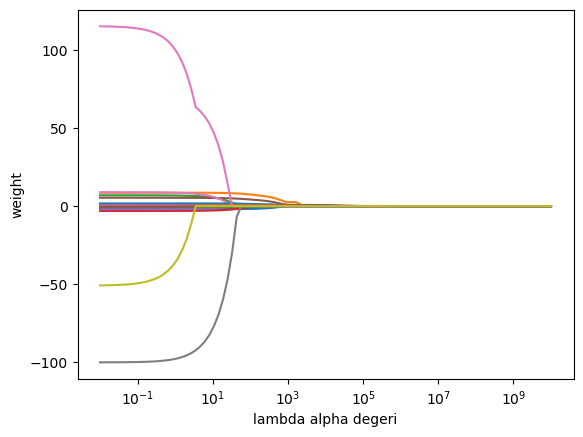

In [72]:
lambdalar=10**np.linspace(10,-2,100)*0.5
ridge_model=Lasso()
katsayilar=[]

for i in lambdalar:
    lasso_model.set_params(alpha=i)
    lasso_model.fit(X_train,y_train)
    katsayilar.append(lasso_model.coef_)

ax=plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("lambda alpha degeri")
plt.ylabel("weight")



In [73]:
y_pred=lasso_model.predict(X_test)

In [74]:
hata=np.sqrt(mean_squared_error(y_test,y_pred))

In [75]:
hata

356.83300311355543

## Model Dogrulama


In [77]:
from sklearn.linear_model import LassoCV

In [79]:
lassoCv_model=LassoCV(alphas=None, cv=10, max_iter=10000)

In [80]:
lassoCv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [93]:
lassoCv_model.alpha_

563.4670862944163

In [95]:
lasso_tuned=Lasso(alpha=lassoCv_model.alpha_).fit(X_train,y_train)

In [96]:
y_pred=lasso_tuned.predict(X_test)
hata=np.sqrt(mean_squared_error(y_test,y_pred))

In [97]:
hata

373.5957148390721

(array([13.24186344, 13.17208814, 13.10231284, 13.03253754, 12.96276225,
        12.89298695, 12.82321165, 12.75343635, 12.68366105, 12.61388576,
        12.54411046, 12.47433516, 12.40455986, 12.33478456, 12.26500926,
        12.19523397, 12.12545867, 12.05568337, 11.98590807, 11.91613277,
        11.84635747, 11.77658217, 11.70680688, 11.63703158, 11.56725628,
        11.49748098, 11.42770568, 11.35793038, 11.28815508, 11.21837978,
        11.14860448, 11.07882918, 11.00905389, 10.93927859, 10.86950329,
        10.79972799, 10.72995269, 10.66017739, 10.59040209, 10.52062679,
        10.45085149, 10.38107619, 10.31130089, 10.24152559, 10.17175029,
        10.10197499, 10.03219969,  9.96242439,  9.89264909,  9.82287379,
         9.75309849,  9.68332319,  9.61354789,  9.54377259,  9.47399729,
         9.40422199,  9.33444669,  9.26467139,  9.19489609,  9.12512079,
         9.05534549,  8.98557019,  8.91579489,  8.84601959,  8.77624429,
         8.70646899,  8.63669369,  8.56691839,  8.4

# Elastik Net Regression 
> Bu llasso l1 ve ridgde l2 regresyonlarını birleştiren bir yaklaşımdır

In [98]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df.Salary
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float32")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)                
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)


In [99]:
from sklearn.linear_model import ElasticNet

In [100]:
enet_model=ElasticNet().fit(X_train,y_train)

In [101]:
enet_model.coef_

array([ -1.8625609 ,   8.704905  ,   5.104286  ,  -2.8987958 ,
        -1.2864475 ,   5.2434545 ,   6.0447717 ,  -0.14701506,
        -0.21567813,  -0.7897505 ,   1.8081502 ,   0.80916196,
        -0.61262834,   0.2681618 ,   0.27172363,  -0.3653173 ,
        19.21866   , -31.165804  ,   8.983673  ], dtype=float32)

In [102]:
enet_model.intercept_

-6.4658813

In [103]:
ypred=enet_model.predict(X_test)

In [105]:
hata=np.sqrt(mean_squared_error(y_test,y_pred))

In [106]:
hata

373.5957148390721

In [107]:
from sklearn.linear_model import ElasticNetCV

In [108]:
enetcv_model=ElasticNetCV(cv=10,random_state=0).fit(X_train,y_train)

In [109]:
enetcv_model.alpha_

5230.76507170498

In [110]:
#final modeli
enet_tuned=ElasticNet(alpha=enetcv_model.alpha_).fit(X_train,y_train)

In [111]:
enet_tuned.coef_

array([ 0.628454  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.0978874 ,  0.        ,
        0.2726582 ,  0.19270055,  0.00758651,  0.31065288,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ], dtype=float32)

In [112]:
ypred=enet_tuned.predict(X_test)

In [113]:
hata=np.sqrt(mean_squared_error(y_test,y_pred))

In [114]:
hata

373.5957148390721

SyntaxError: unexpected EOF while parsing (3804181390.py, line 1)